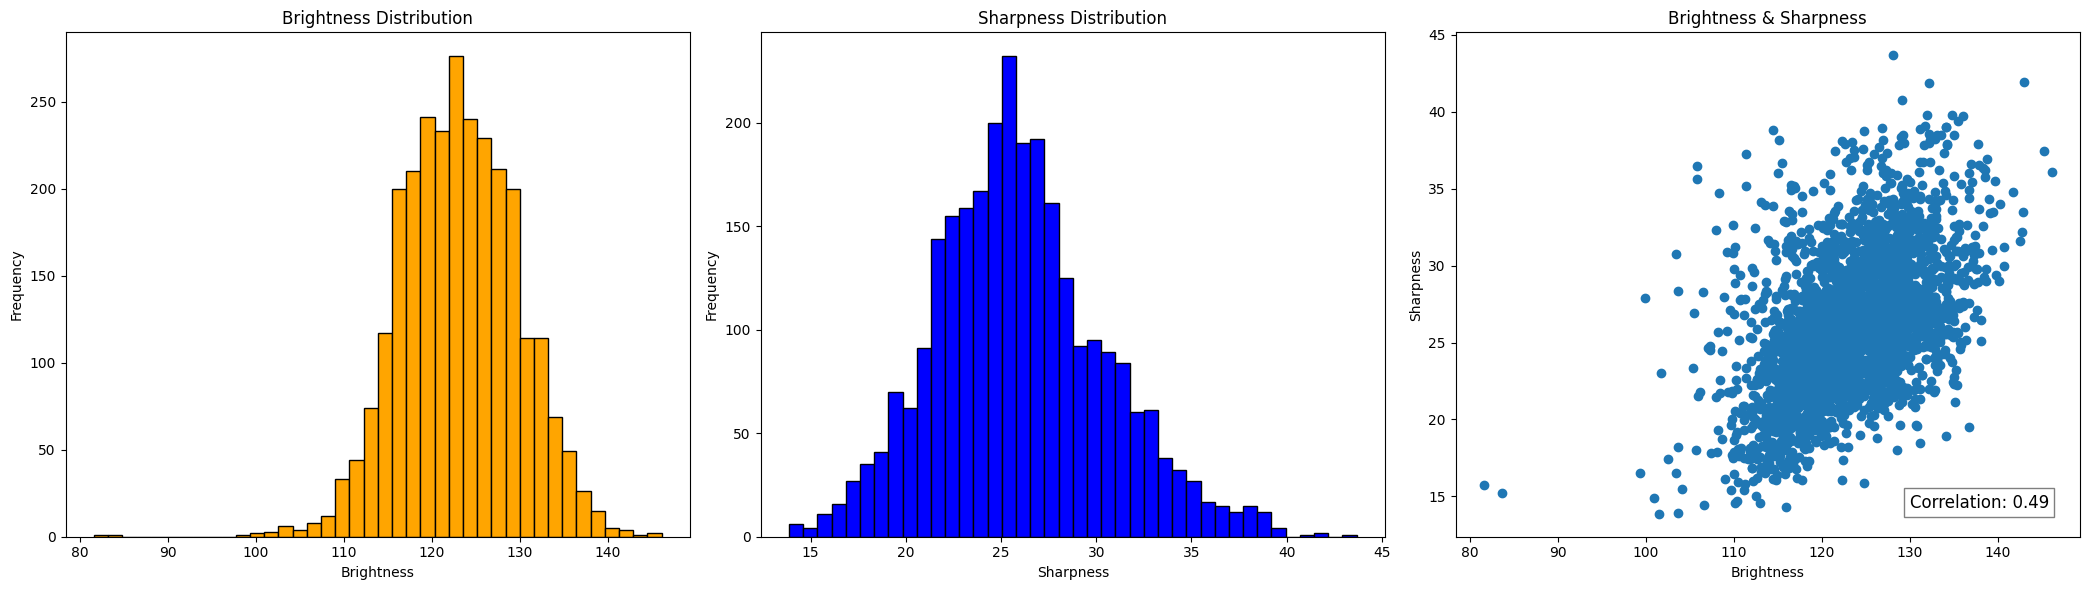

In [ ]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageEnhance

# 밝기 계산 함수
def calculate_brightness(image):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    return hsv[:, :, 2].mean()

# 선명도 계산 함수
def calculate_sharpness(image):
    image_pil = Image.fromarray(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    enhancer = ImageEnhance.Sharpness(image_pil)
    sharpness = np.array(enhancer.enhance(1).convert('L')).std()
    return sharpness

# 이미지 경로 필터링 및 데이터 로드
def load_images_from_folder(folder_path):
    image_paths = []
    for subdir, _, files in os.walk(folder_path):
        for file_name in files:
            if file_name.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
                image_paths.append(os.path.join(subdir, file_name))
    return image_paths

# 분석 및 시각화
def analyze_images(image_paths):
    brightness_values = []
    sharpness_values = []

    for path in image_paths:
        image = cv2.imread(path)
        if image is not None:
            brightness = calculate_brightness(image)
            brightness_values.append(brightness)

            sharpness = calculate_sharpness(image)
            sharpness_values.append(sharpness)

    # 히스토그램 그리기
    plt.figure(figsize=(21, 6))

    # 밝기 히스토그램
    plt.subplot(1, 3, 1)
    plt.hist(brightness_values, bins=40, color='orange', edgecolor='black')
    plt.title('Brightness Distribution')
    plt.xlabel('Brightness')
    plt.ylabel('Frequency')

    # 선명도 히스토그램
    plt.subplot(1, 3, 2)
    plt.hist(sharpness_values, bins=40, color='blue', edgecolor='black')
    plt.title('Sharpness Distribution')
    plt.xlabel('Sharpness')
    plt.ylabel('Frequency')

    # 밝기와 선명도 산점도
    plt.subplot(1, 3, 3)
    plt.scatter(brightness_values, sharpness_values)
    plt.title('Brightness & Sharpness')
    plt.xlabel('Brightness')
    plt.ylabel('Sharpness')

    # 상관계수 계산 및 표시
    correlation_coef = np.corrcoef(brightness_values, sharpness_values)[0, 1]
    plt.text(0.95, 0.05, f'Correlation: {correlation_coef:.2f}',
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='bottom',
             horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.5))

    plt.tight_layout()
    plt.show()

# TMJ OA 폴더 경로
tmj_folder = "/content/drive/MyDrive/TMJ OA/기존 CBCT 1,3 + NEW CBCT 1,2"  # 환경에 맞게 수정

# 이미지 경로 로드
image_paths = load_images_from_folder(tmj_folder)

# 이미지 분석 및 결과 시각화
analyze_images(image_paths)


밝기 및 선명도 분석 완료.
분석된 Brightness values: [135.0619375, 132.85084375, 141.7309, 135.429075, 126.46516875]
분석된 Sharpness values: [32.557216961007185, 27.937117713949768, 34.76113397445486, 31.86639777484075, 25.86640387228235]


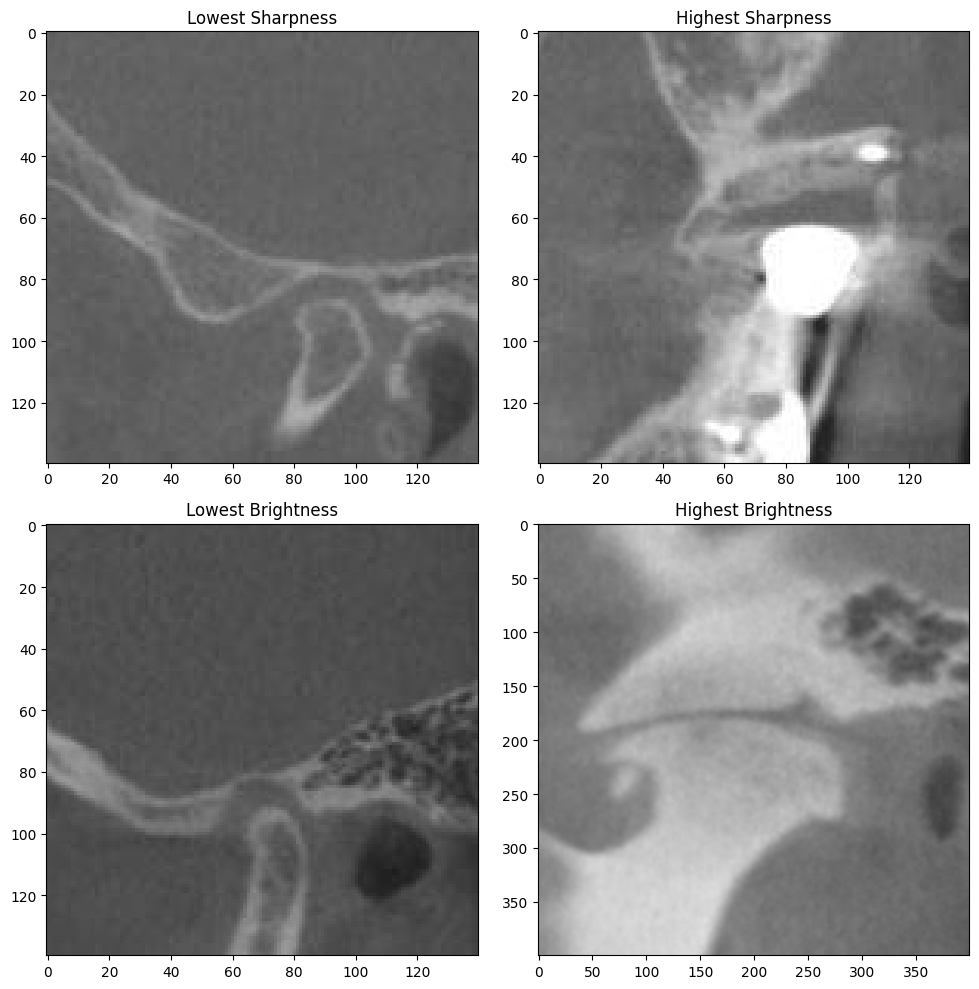

In [2]:
brightness_values = []
sharpness_values = []

for path in image_paths:
    image = cv2.imread(path)
    if image is not None:
        try:
            # 밝기 계산
            brightness = calculate_brightness(image)
            brightness_values.append(brightness)

            # 선명도 계산
            sharpness = calculate_sharpness(image)
            sharpness_values.append(sharpness)
        except Exception as e:
            print(f"이미지 분석 실패: {path}, 오류: {e}")
    else:
        print(f"이미지를 로드할 수 없습니다: {path}")

print("밝기 및 선명도 분석 완료.")
print(f"분석된 Brightness values: {brightness_values[:5]}")
print(f"분석된 Sharpness values: {sharpness_values[:5]}")


# 가장 낮고 높은 선명도를 가진 이미지
min_sharpness_idx = np.argmin(sharpness_values)
max_sharpness_idx = np.argmax(sharpness_values)

# 가장 낮고 높은 밝기를 가진 이미지
min_brightness_idx = np.argmin(brightness_values)
max_brightness_idx = np.argmax(brightness_values)

# 이미지 보여주기
plt.figure(figsize=(10, 10))

# 선명도가 가장 낮은 이미지
plt.subplot(2, 2, 1)
image = cv2.imread(image_paths[min_sharpness_idx])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Lowest Sharpness')

# 선명도가 가장 높은 이미지
plt.subplot(2, 2, 2)
image = cv2.imread(image_paths[max_sharpness_idx])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Highest Sharpness')

# 밝기가 가장 낮은 이미지
plt.subplot(2, 2, 3)
image = cv2.imread(image_paths[min_brightness_idx])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Lowest Brightness')

# 밝기가 가장 높은 이미지
plt.subplot(2, 2, 4)
image = cv2.imread(image_paths[max_brightness_idx])
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Highest Brightness')

plt.tight_layout()
plt.show()